# Initializers

In [41]:
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import math

sys.path.append(os.pardir)
from common.mnist import *
from common.functions import *
from common.layers import *
from common.util import *
from common.optimizer import *

## Multilayer Neural Network Model

In [42]:
import sys, os
from collections import OrderedDict
from scipy import stats
from pandas import DataFrame

class TwoLayerNet2:
    def __init__(self, input_size, hidden_layer1_size, hidden_layer2_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_layer1_size)
        self.params['b1'] = np.zeros(hidden_layer1_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_layer1_size, hidden_layer2_size)
        self.params['b2'] = np.zeros(hidden_layer2_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_layer2_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        
        self.activations = OrderedDict()
        self.activations[0] = None
        

        self.lastLayer = SoftmaxWithCrossEntropyLoss()
            
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def backpropagation_gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        din = 1
        din = self.lastLayer.backward(din)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            din = layer.backward(din)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db

        return grads
    
    def learning(self, learning_rate, x_batch, t_batch, optimizer):
        grads = self.backpropagation_gradient(x_batch, t_batch)
        optimizer.update(self.params, grads)

## Learning and Validation

In [45]:
data = mnist_data("/Users/yhhan/git/aiclass/0.Professor/data/MNIST_data/.")
(img_train, label_train), (img_validation, label_validation), (img_test, label_test) = data.load_mnist(flatten=True, normalize=True, one_hot_label=True)

network = TwoLayerNet2(input_size=784, hidden_layer1_size=128, hidden_layer2_size=128, output_size=10)

num_epochs = 50
train_size = img_train.shape[0]
batch_size = 1000
learning_rate = 0.1
optimizer = AdaGrad()

train_error_list = []
validation_error_list = []

test_accuracy_list = []
epoch_list = []

num_batch = math.ceil(train_size / batch_size)

for i in range(num_epochs):
    for j in range(num_batch):
        x_batch = img_train[j * batch_size : j * batch_size + batch_size]
        t_batch = label_train[j * batch_size : j * batch_size + batch_size]
        network.learning(learning_rate, x_batch, t_batch, optimizer)

    epoch_list.append(i)
    
    train_loss = network.loss(x_batch, t_batch)
    train_error_list.append(train_loss)
    
    validation_loss = network.loss(img_validation, label_validation)
    validation_error_list.append(validation_loss)    
    
    test_accuracy = network.accuracy(img_test, label_test)
    test_accuracy_list.append(test_accuracy)       
    
    print("Epoch: {0:5d}, Train Error: {1:7.5f}, Validation Error: {2:7.5f} - Test Accuracy: {3:7.5f}".format(
        i,
        train_loss,
        validation_loss,
        test_accuracy
    ))
    f, axarr = plt.subplots(1, 5, figsize=(25,5))
    for i, a in activations.items():
        axarr[i].hist(a.flatten(), 20)
        axarr[i].set_title(str(i+1) + "-layer")

    f.subplots_adjust(wspace=0.2)
    plt.show()

Epoch:     0, Train Error: 0.39413, Validation Error: 0.33704 - Test Accuracy: 0.88920
Epoch:     1, Train Error: 0.30972, Validation Error: 0.25580 - Test Accuracy: 0.91080
Epoch:     2, Train Error: 0.26711, Validation Error: 0.22052 - Test Accuracy: 0.92100
Epoch:     3, Train Error: 0.23633, Validation Error: 0.19795 - Test Accuracy: 0.92890
Epoch:     4, Train Error: 0.21049, Validation Error: 0.18075 - Test Accuracy: 0.93330
Epoch:     5, Train Error: 0.18810, Validation Error: 0.16664 - Test Accuracy: 0.93600
Epoch:     6, Train Error: 0.17004, Validation Error: 0.15593 - Test Accuracy: 0.94070
Epoch:     7, Train Error: 0.15557, Validation Error: 0.14758 - Test Accuracy: 0.94480
Epoch:     8, Train Error: 0.14369, Validation Error: 0.14097 - Test Accuracy: 0.94740
Epoch:     9, Train Error: 0.13381, Validation Error: 0.13550 - Test Accuracy: 0.94960
Epoch:    10, Train Error: 0.12553, Validation Error: 0.13094 - Test Accuracy: 0.95160
Epoch:    11, Train Error: 0.11838, Validat

In [7]:
x = np.random.randn(1000, 100) # 1000 x 100
node_num = 100 #각 은닉층의 노드 수
num_hidden_layers = 5 # 5개의 은닉층

activations = OrderedDict()

for i in range(num_hidden_layers):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * 1.0
    b = np.random.randn(node_num) * 1.0
    u = np.dot(x, w) + b
    activations[i] = sigmoid(u)

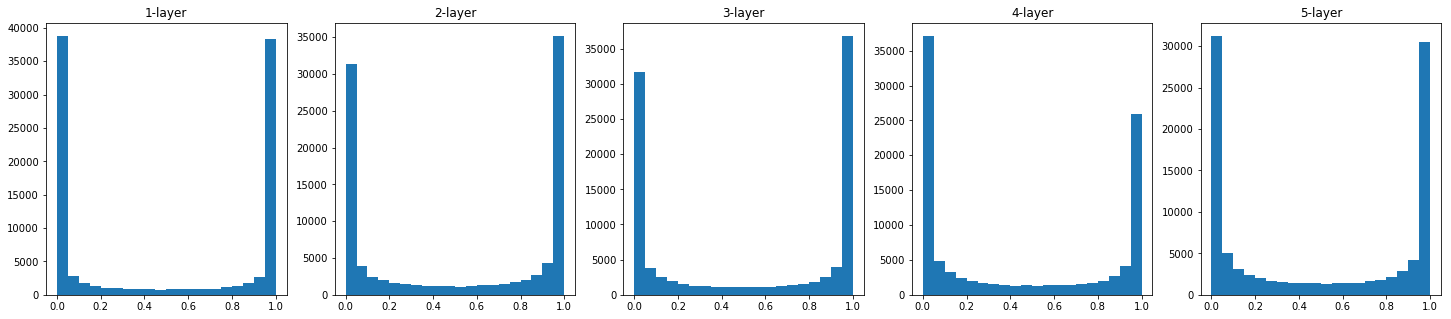

In [35]:
f, axarr = plt.subplots(1, 5, figsize=(25,5))
for i, a in activations.items():
    axarr[i].hist(a.flatten(), 20)
    axarr[i].set_title(str(i+1) + "-layer")
    
f.subplots_adjust(wspace=0.2)
plt.show()

In [29]:
? f.subplots_adjust

#### 2. Momentum

In [3]:
class Momentum:
    def __init__(self, learning_rate=0.01, momentum=0.9):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.learning_rate * grads[key]
            params[key] += self.v[key]

#### 3. Nesterov
- Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)

In [15]:
class Nesterov:
    def __init__(self, learning_rate=0.01, momentum=0.9):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.v[key] *= self.momentum
            self.v[key] -= self.learning_rate * grads[key]
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.learning_rate * grads[key]

#### 4. AdaGrad
- John Duchi, Elad Hazan, Yoram Singer, "Adaptive Subgradient Methods for Online Learning and Stochastic Optimization," Journal of Machine Learning Research 12 (2011) 2121-2159.
- http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf

In [4]:
class AdaGrad:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.learning_rate * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

#### 5. RMSprop
- Tieleman, T. and Hinton, G., Divide the gradient by a running average of its recent magnitude, COUSERA: Neural Networks for Machine LearningRMSProp: Lecture 6.5, 2012
- https://www.coursera.org/learn/neural-networks/lecture/YQHki/rmsprop-divide-the-gradient-by-a-running-average-of-its-recent-magnitude

In [12]:
class RMSprop:
    def __init__(self, learning_rate=0.01, decay_rate = 0.99):
        self.learning_rate = learning_rate
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.learning_rate * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

#### 6. Adam
- Diederik P. Kingma, Jimmy Ba, "Adam: A Method for Stochastic Optimization," arXiv:1412.6980, Dec., 2014.
- https://arxiv.org/pdf/1412.6980.pdf

In [13]:
class Adam:
    def __init__(self, learning_rate=0.01, beta1=0.9, beta2=0.999):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        learning_rate_t  = self.learning_rate * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])            
            params[key] -= learning_rate_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

In [23]:
optimizers = OrderedDict()
optimizers["SGD"] = SGD(learning_rate=0.95)
optimizers["Momentum"] = Momentum(learning_rate=0.1)
optimizers["Nesterov"] = Nesterov(learning_rate=0.08)
optimizers["AdaGrad"] = AdaGrad(learning_rate=1.5)
optimizers["RMSprop"] = RMSprop(learning_rate=0.2)
optimizers["Adam"] = Adam(learning_rate=0.3)

## Funcions
- $f(x) = \frac{1}{20}x^2 + y^2$
- $f'(x) = \frac{1}{10}x + 2y$

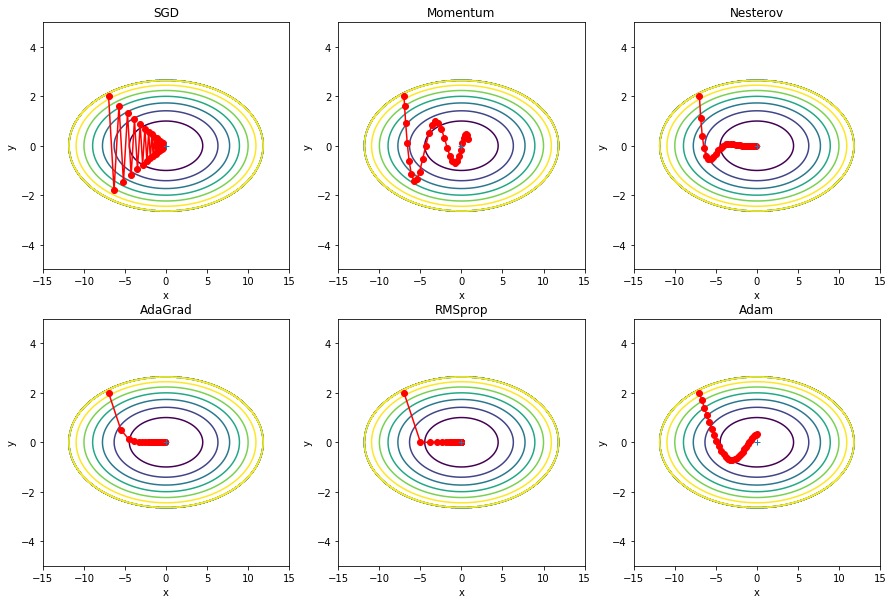

In [24]:
def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

idx = 1
fig = plt.figure(figsize=(15, 10))

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-15, 15, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 

    sub_figure = fig.add_subplot(230 + idx)
    idx += 1
    sub_figure.plot(x_history, y_history, 'o-', color="red")
    sub_figure.contour(X, Y, Z)
    sub_figure.set_xlim(-15, 15)
    sub_figure.set_ylim(-5, 5)
    
    sub_figure.plot(0, 0, '+')
    sub_figure.set_title(key)
    sub_figure.set_xlabel("x")
    sub_figure.set_ylabel("y")
    
plt.show()